In [2]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
G = nx.Graph()

In [9]:
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_weighted_edges_from([('A','B', 22), ('A','C', 50), ('A','D', 48), ('A', 'E', 29)], tx_y=0, nx_y=0, txn=0, pxy=0)
G.add_weighted_edges_from([('B','A', 22), ('B','C', 30), ('B','D', 34), ('B', 'E', 32)], tx_y=0, nx_y=0, txn=0, pxy=0)
G.add_weighted_edges_from([('C','A', 50), ('C','B', 30), ('C','D', 22), ('C', 'E', 23)], tx_y=0, nx_y=0, txn=0, pxy=0)
G.add_weighted_edges_from([('D','A', 48), ('D','B', 34), ('D','C', 22), ('D', 'E', 35)], tx_y=0, nx_y=0, txn=0, pxy=0)
G.add_weighted_edges_from([('E','A', 29), ('E','B', 32), ('E','C', 23), ('E', 'D', 35)], tx_y=0, nx_y=0, txn=0, pxy=0)

In [10]:
G.get_edge_data('A','C')
#G['A']['B']['tx_y'] = 5


{'nx_y': 0, 'pxy': 0, 'tx_y': 0, 'txn': 0, 'weight': 50}

In [11]:
labels = nx.get_edge_attributes(G,'weight')
print(labels.values())

dict_values([48, 30, 22, 23, 29, 32, 22, 34, 50, 35])


/home/diego/virtual/ACO/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/diego/virtual/ACO/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/diego/virtual/ACO/lib/python3.4/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/diego/virtual/ACO/lib/python3.4/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

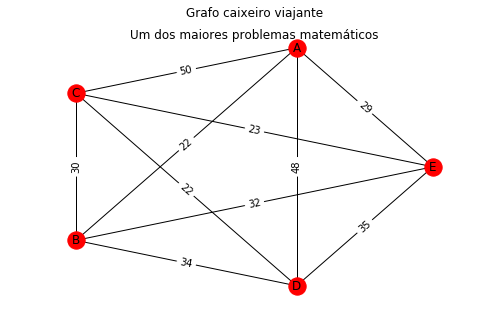

In [12]:
pos=nx.circular_layout(G)
nx.draw(G,pos, with_labels=True)
#nx.draw_circular(G,node_color='r',with_labels=True, edge_labels=labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo caixeiro viajante")
plt.suptitle("Um dos maiores problemas matemáticos")
plt.show()

In [28]:
def float2(value, qf):
    return float('%.'+str(qf)+'f' % (value))

def sumAllNeighborsAndTxyNxy(vertice):
    s = 0
    for vizinho in G.neighbors(vertice):
        Atx_y = float("%.3f" % (1/G.get_edge_data(vertice, vizinho)['weight']))
        Anx_y = 0.1
        Atxn = float("%.3f" % (Atx_y*Anx_y))
        s += Atxn
    return s

def preparingPlot():
    all_atributes, routs, distances, tx_y, nx_y, txn, pxy, ppxy = [], [], [], [], [], [], [], []

    for vertice in G.nodes():
        for vizinho in G.neighbors(vertice):
            routs.append([vertice, vizinho])
            distances.append(G.get_edge_data(vertice, vizinho)['weight'])
            tx_y.append(G.get_edge_data(vertice, vizinho)['tx_y'])
            nx_y.append(G.get_edge_data(vertice, vizinho)['nx_y'])
            txn.append(G.get_edge_data(vertice, vizinho)['txn'])
            pxy.append(G.get_edge_data(vertice, vizinho)['pxy'])
            ppxy.append(G.get_edge_data(vertice, vizinho)['pxy'] * 100)
    all_atributes.append(routs)
    all_atributes.append(distances)
    all_atributes.append(tx_y)
    all_atributes.append(nx_y)
    all_atributes.append(txn)
    all_atributes.append(pxy)
    all_atributes.append(ppxy)
    
    return all_atributes
        
    
    
for vertice in G.nodes():
    sumTxVertice = sumAllNeighborsAndTxyNxy(vertice)
    for vizinho in G.neighbors(vertice):
        Atx_y = float("%.3f" % (1/G.get_edge_data(vertice, vizinho)['weight']))
        Anx_y = 0.1
        Atxn = float("%.3f" % (Atx_y*Anx_y))
        Apxy = float("%.3f" % (Atxn/sumTxVertice))
        G[vertice][vizinho]['tx_y'] = Atx_y
        G[vertice][vizinho]['nx_y'] = Anx_y
        G[vertice][vizinho]['txn'] = Atxn
        G[vertice][vizinho]['pxy'] = Apxy

In [29]:
pre_dados = preparingPlot()

dados = {
    '1. Rotas':pre_dados[0],
    '2. Distância':pre_dados[1],
    '3. t(xy)':pre_dados[2],
    '4. n(xy)':pre_dados[3],
    '5. t(xy)*n(xy)':pre_dados[4],
    '6. P(xy)':pre_dados[5],
    '7. P(xy) %':pre_dados[6]
}

df = pd.DataFrame(dados)
df

,1. Rotas,2. Distância,3. t(xy),4. n(xy),5. t(xy)*n(xy),6. P(xy),7. P(xy) %
0,"[E, A]",29,0.034,0.1,0.003,0.273,27.3
1,"[E, C]",23,0.043,0.1,0.004,0.308,30.8
2,"[E, B]",32,0.031,0.1,0.003,0.231,23.1
3,"[E, D]",35,0.029,0.1,0.003,0.250,25.0
4,"[A, E]",29,0.034,0.1,0.003,0.273,27.3
5,"[A, C]",50,0.020,0.1,0.002,0.154,15.4
6,"[A, B]",22,0.045,0.1,0.004,0.308,30.8
7,"[A, D]",48,0.021,0.1,0.002,0.167,16.7
8,"[C, E]",23,0.043,0.1,0.004,0.308,30.8
9,"[C, A]",50,0.020,0.1,0.002,0.154,15.4


In [51]:
import random

# declarando as formigas

class Ant(object):
    def __init__(self, saida):
        self.saida = saida
        self.pontos_visitados = [saida]
        self.arestas_visitadas = []
    
    def caminhar(self):
        self.roulette_wheel(self.saida)        
        self.pontos_visitados.append(self.saida)
        for i in range(len(self.pontos_visitados)-2):
            self.arestas_visitadas.append((self.pontos_visitados[i], self.pontos_visitados[i+1]))
        print(self.pontos_visitados)
    
    def roulette_wheel(self, inicio):
        if len(self.pontos_visitados) >= 5:
            return
        
        list_drawn = list()
        map_prepositions = list()
        for i in G.neighbors(inicio):
            for a in range(int(G.get_edge_data(inicio, i)['pxy']*1000)):
                map_prepositions.append(i)
        
        new_key_drawn = random.choice(map_prepositions)
        while new_key_drawn in self.pontos_visitados:
            new_key_drawn = random.choice(map_prepositions)
        self.pontos_visitados.append(new_key_drawn)
        self.roulette_wheel(new_key_drawn)

    def sum_route(self):
        distancia_caminho = 0
        for i in range(len(self.pontos_visitados)-1):
            distancia_caminho += G.get_edge_data(self.pontos_visitados[i], self.pontos_visitados[i+1])['weight']
        return distancia_caminho


f1 = Ant('A')
f1.caminhar()
print(f1.sum_route())
print(f1.arestas_visitadas)

f2 = Ant('B')
f2.caminhar()
print(f2.sum_route())

f3 = Ant('C')
f3.caminhar()
print(f3.sum_route())

f4 = Ant('D')
f4.caminhar()
print(f4.sum_route())

f5 = Ant('E')
f5.caminhar()
print(f5.sum_route())

['A', 'E', 'C', 'D', 'B', 'A']
130
[('A', 'E'), ('E', 'C'), ('C', 'D'), ('D', 'B')]
['B', 'A', 'C', 'D', 'E', 'B']
161
['C', 'D', 'B', 'A', 'E', 'C']
130
['D', 'C', 'E', 'A', 'B', 'D']
130
['E', 'C', 'B', 'D', 'A', 'E']
164


In [68]:
# tabela de atualização do feromônio

coeficiente_feromonio = 0.099

for r in G.edges():
    if (r[0],r[1]) == ('A','E'):
        print("SIM")